In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# load data obtained from each operating conditions at all current densities
as_600 = np.load("Data/wrangled_data/as_600.npy")
cs_600 = np.load("Data/wrangled_data/cs_600.npy")
normal_600 = np.load("Data/wrangled_data/normal_600.npy")

as_700 = np.load("Data/wrangled_data/as_700.npy")
cs_700 = np.load("Data/wrangled_data/cs_700.npy")
normal_700 = np.load("Data/wrangled_data/normal_700.npy")

as_800 = np.load("Data/wrangled_data/as_800.npy")
cs_800 = np.load("Data/wrangled_data/cs_800.npy")
normal_800 = np.load("Data/wrangled_data/normal_800.npy")

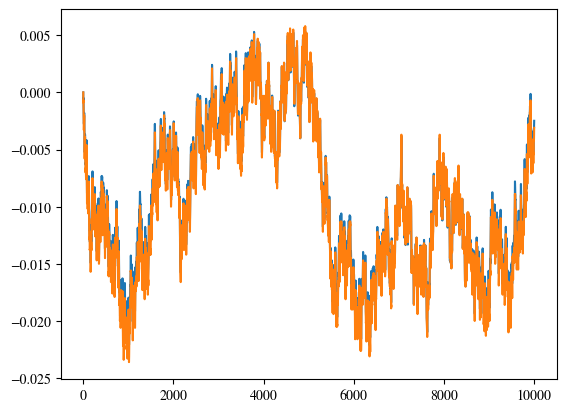

(10001,)

In [3]:
plt.plot(as_600.mean(axis=0))
plt.plot(as_600[100])
plt.show()
as_600[0].shape

In [4]:
x = np.linspace(start=0, stop=1, num=len(as_600[0]))
colourset = ['darkgreen', 'blue', 'red'] * 3
yticks = [800, 800, 800, 700, 700, 700, 600, 600, 600]
signals = [as_800[0], normal_800[0], cs_800[0], as_700[0], normal_700[0], cs_700[0], as_600[0], normal_600[0], normal_600[0]]
x.shape

(10001,)

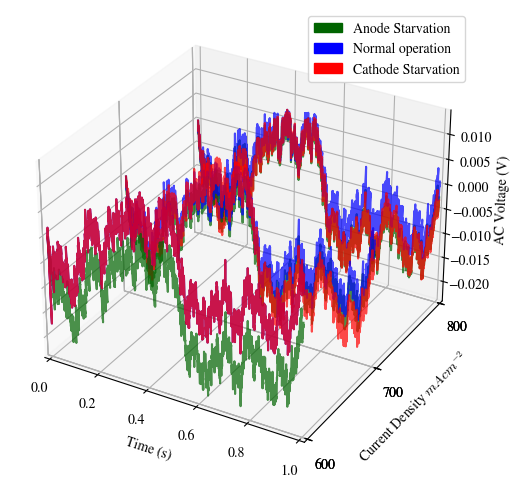

In [5]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(projection='3d')

for i in range(len(signals)):
    ax.plot(xs=x, ys=signals[i], zs=yticks[i], zdir='y', color=colourset[i], alpha=0.7)
ax.set_yticks(yticks)
ax.set_xlim(xmax=1, xmin=0)
ax.set_ylim(ymin=600, ymax=800)
green_patch = mpatches.Patch(color='darkgreen', label='Anode Starvation')
black_patch = mpatches.Patch(color='blue', label='Normal operation')
red_patch = mpatches.Patch(color='red', label='Cathode Starvation')
ax.legend(handles=[green_patch, black_patch,red_patch])

ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Current Density $mAcm^{-2}$')
ax.set_zlabel('AC Voltage (V)')
plt.show()


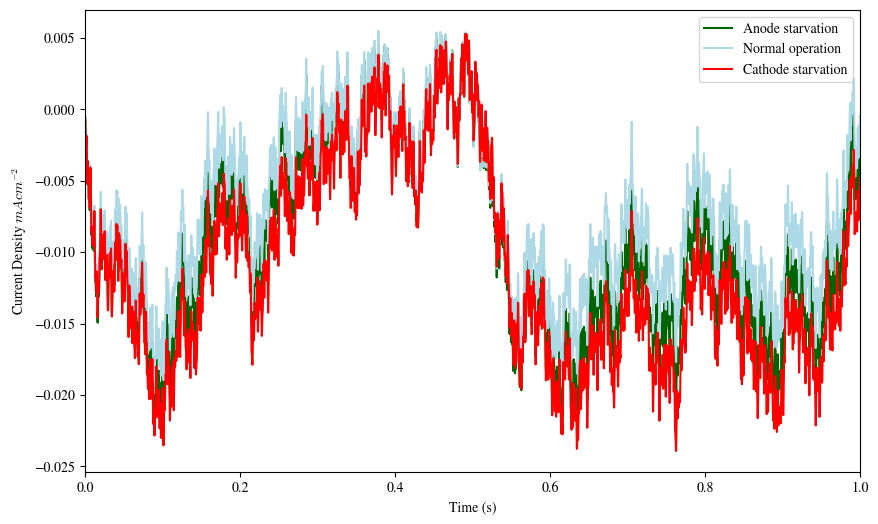

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x,as_600.mean(axis=0), color="darkgreen", label="Anode starvation")
ax.plot(x,normal_600.mean(axis=0), color="lightblue", label="Normal operation")
ax.plot(x,cs_600.mean(axis=0), color="red", label="Cathode starvation")
ax.set_xlim(xmin=0, xmax=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Current Density $mAcm^{-2}$')
ax.legend()
plt.show()

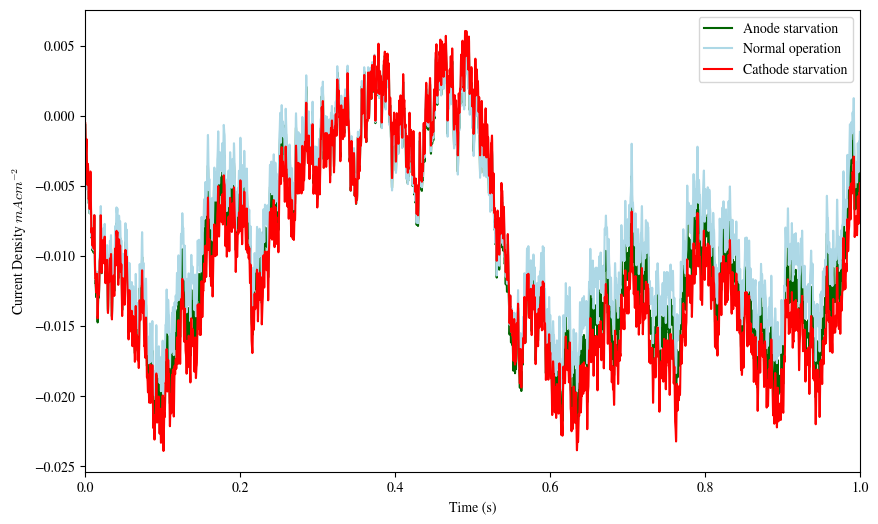

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x,as_700.mean(axis=0), color="darkgreen", label="Anode starvation")
ax.plot(x,normal_700.mean(axis=0), color="lightblue", label="Normal operation")
ax.plot(x,cs_700.mean(axis=0), color="red", label="Cathode starvation")
ax.set_xlim(xmin=0, xmax=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Current Density $mAcm^{-2}$')
ax.legend()
plt.show()

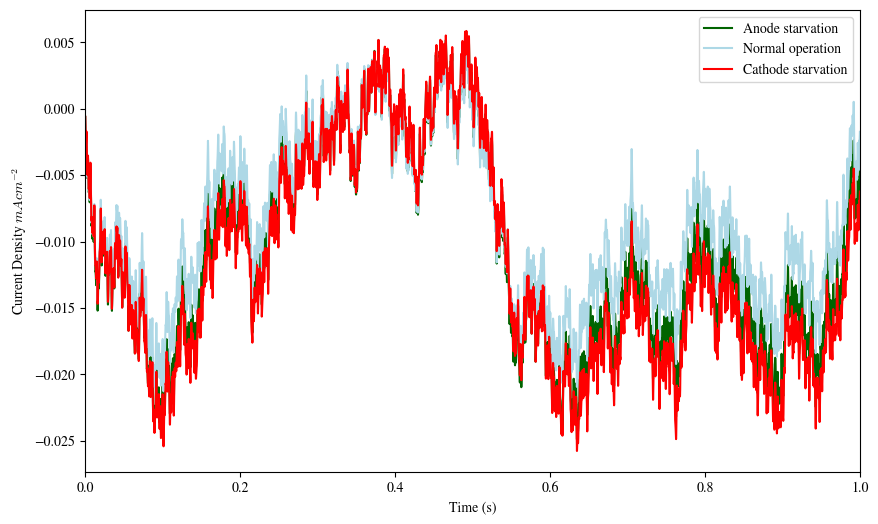

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x,as_800.mean(axis=0), color="darkgreen", label="Anode starvation")
ax.plot(x,normal_800.mean(axis=0), color="lightblue", label="Normal operation")
ax.plot(x,cs_800.mean(axis=0), color="red", label="Cathode starvation")
ax.set_xlim(xmin=0, xmax=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Current Density $mAcm^{-2}$')
ax.legend()
plt.show()

In [40]:
# Create labels for each SoH
label_AS = np.zeros(as_600.shape[0])
label_normal = np.ones(normal_600.shape[0])
label_CS = np.ones(cs_600.shape[0]) * 2

X = np.vstack((as_600, normal_600, cs_600))

X = StandardScaler().fit_transform(X)
Y = np.hstack((label_AS, label_normal, label_CS))

lda_600 = LinearDiscriminantAnalysis(n_components=2)

dr_600 = lda_600.fit(X,Y).transform(X)

In [31]:
target_names = ["Anode starvation", "Normal operation", "Cathode starvation"]

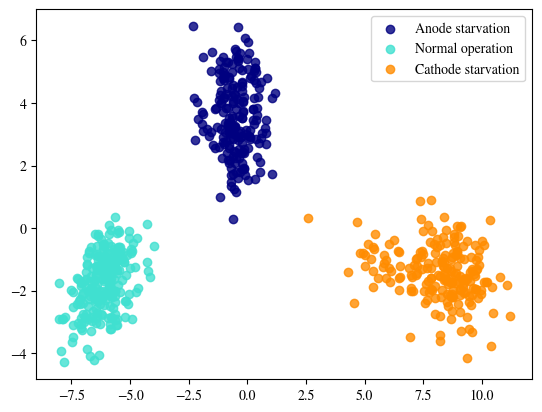

In [24]:
colors = ["navy", "turquoise", "darkorange"]
lw = 2



plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        dr_600[Y == i, 0], dr_600[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)


plt.show()

In [48]:
pca_600 = PCA(n_components=2).fit_transform(X,Y)


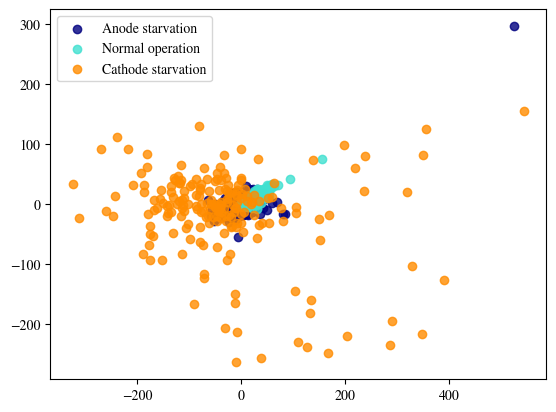

In [49]:
target_names = ["Anode starvation", "Normal operation", "Cathode starvation"]
colors = ["navy", "turquoise", "darkorange"]
lw = 2



plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        pca_600[Y == i, 0], pca_600[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)


plt.show()

In [55]:
print(f"Silhouette Coefficient: {silhouette_score(dr_600, labels=Y):.3f}")


Silhouette Coefficient: 0.794


In [51]:
X = np.vstack((as_700, normal_700, cs_700))
Y = np.hstack((label_AS, label_normal, label_CS))


X = StandardScaler().fit_transform(X)
Y = np.hstack((label_AS, label_normal, label_CS))

lda_700 = LinearDiscriminantAnalysis(n_components=2)

dr_700 = lda_700.fit(X,Y).transform(X)

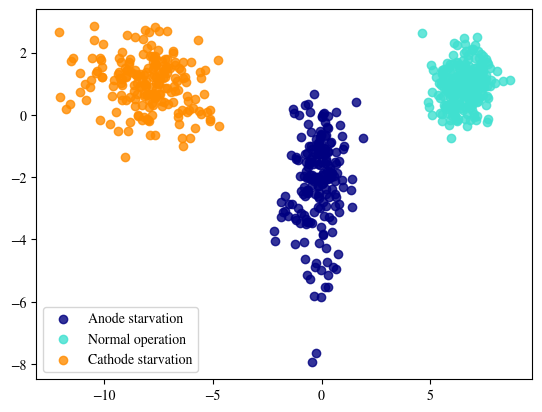

In [52]:
target_names = ["Anode starvation", "Normal operation", "Cathode starvation"]
colors = ["navy", "turquoise", "darkorange"]
lw = 2



plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        dr_700[Y == i, 0], dr_700[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)


plt.show()

In [56]:
print(f"Silhouette Coefficient: {silhouette_score(dr_700, labels=Y):.3f}")

Silhouette Coefficient: 0.785


In [57]:
pca_700 = PCA(n_components=2).fit_transform(X,Y)

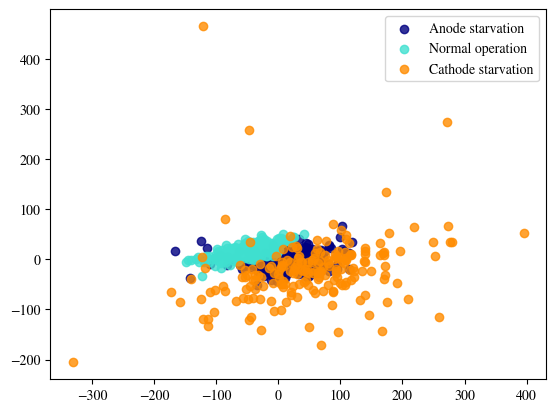

In [58]:
target_names = ["Anode starvation", "Normal operation", "Cathode starvation"]
colors = ["navy", "turquoise", "darkorange"]
lw = 2



plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        pca_700[Y == i, 0], pca_700[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)


plt.show()

In [59]:
print(f"Silhouette Coefficient: {silhouette_score(pca_700, labels=Y):.3f}")

Silhouette Coefficient: 0.139


In [61]:
X = np.vstack((as_800, normal_800, cs_800))
X = StandardScaler().fit_transform(X)
Y = np.hstack((label_AS, label_normal, label_CS))

lda_800 = LinearDiscriminantAnalysis(n_components=2).fit_transform(X,Y)



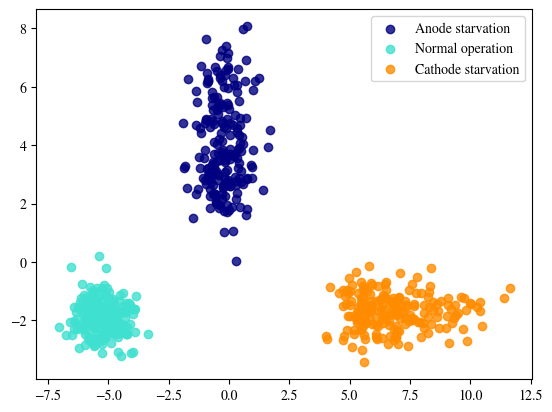

In [62]:
target_names = ["Anode starvation", "Normal operation", "Cathode starvation"]
colors = ["navy", "turquoise", "darkorange"]
lw = 2



plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        lda_800[Y == i, 0], lda_800[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)


plt.show()

In [63]:
print(f"Silhouette Coefficient: {silhouette_score(lda_800, labels=Y):.3f}")

Silhouette Coefficient: 0.801


In [64]:
pca_800 = PCA(n_components=2).fit_transform(X,Y)

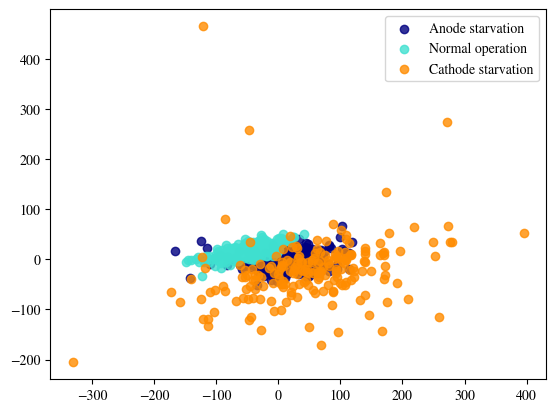

In [65]:
target_names = ["Anode starvation", "Normal operation", "Cathode starvation"]
colors = ["navy", "turquoise", "darkorange"]
lw = 2



plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        pca_700[Y == i, 0], pca_700[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)


plt.show()

In [66]:
print(f"Silhouette Coefficient: {silhouette_score(pca_800, labels=Y):.3f}")

Silhouette Coefficient: 0.250
